# Project 1- Group 37

# 1 Packages

In [1]:
import numpy as np
import pandas as pd
import sys
import time
import matplotlib.pyplot as plt
import preProcessing  as prePros
import LogisticRegression as LR
import modelEvaluation as ME
import NaiveBayes as NB

# 2 Wine Dataset

In [2]:
#Wine Quality
file_path = '../data/WineQualityRed/WineQualityRed.csv'
df  = pd.read_csv(file_path,delimiter=';') 
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,y
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 2.1 Data Preprocessing

In [3]:
# Add a flag column for cleaning purpose
df=prePros.createFlag(df)
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,y,flag
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,ok
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,ok
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,ok
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,ok
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,ok


In [4]:
# Delete spaces and replace speceial characters by NAN
df=prePros.cleanSpecialChar(df)
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,y,flag
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,ok
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,ok
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,ok
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,ok
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,ok


In [5]:
# highlights missing values
df=prePros.cleanSpecialChar(df)
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,y,flag
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,ok
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,ok
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,ok
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,ok
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,ok


In [10]:
#classify 0,1,2,3,4,5 as class 0
#classify 6,7,8 as class 1
df['y']=df['y'].replace([0, 1, 2, 3,4,5], 0)
df['y']=df['y'].replace([6,7,8], 1)
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,y,flag
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,ok
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,ok
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,ok
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,ok
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,ok


In [7]:
#detect outliers
real_columns=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]

df=prePros.flagOutliersReal(df, real_columns)

df.head(5)
  



outlier instances:475


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,y,flag
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,ok
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,ok
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,ok
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,ok
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,ok


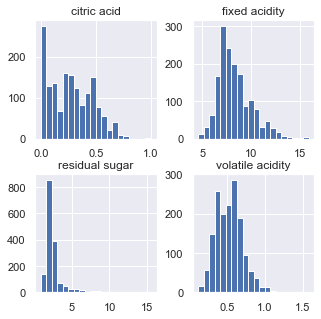

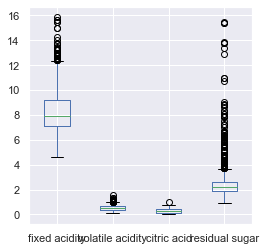

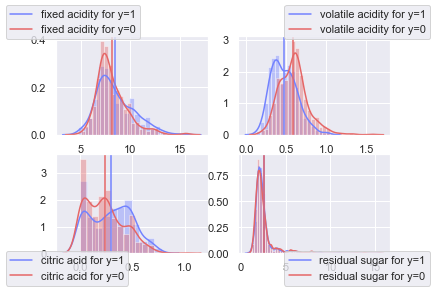

Created Wine.png


In [9]:
# Histogram; ploting the underlying distribution of each features
# in order to understand the nature of each feature and remove malformed features

#plottedFeatures = [c for c in df.columns if c != 'flag']
plottedFeatures=["fixed acidity","volatile acidity","citric acid","residual sugar"]
prePros.draw_histogram(df[plottedFeatures], bins=20, width=5, height=5)
#print ('There are two malformed features, lm1 and Re1')

plottedFeaturesboxplot=["fixed acidity","volatile acidity","citric acid","residual sugar"]
#plottedFeaturesboxplot = [c for c in df.columns if c != 'flag']
xlable = [1 for c in df.columns if c != 'flag']
prePros.draw_boxplots(df, plottedFeaturesboxplot)
x_vars=["fixed acidity","volatile acidity","citric acid","residual sugar"]
prePros.plot_dist_by_category(df, x_vars, 'y', 'y', "Wine")

In [ ]:
# delete flaged rows
df=prePros.delRows(df,'ok')
df.head(5)

In [11]:
# Correlation Coefficients: 
# To study the association between each feature with the output y
y_vars = ["y"]
x_vars = [var for var in df.columns.tolist() if not var in y_vars]
xlable=np.ones((1,32))
corr = df[x_vars + ['y']].corr()
print('The output-y is highly correlated with alcohol, sulphates, and volatile acidity')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)


The output-y is highly correlated with alcohol, sulphates, and volatile acidity


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,y
fixed acidity,1,-0.26,0.67,0.11,0.094,-0.15,-0.11,0.67,-0.68,0.18,-0.062,nan
volatile acidity,-0.26,1,-0.55,0.0019,0.061,-0.011,0.076,0.022,0.23,-0.26,-0.2,nan
citric acid,0.67,-0.55,1,0.14,0.2,-0.061,0.036,0.36,-0.54,0.31,0.11,nan
residual sugar,0.11,0.0019,0.14,1,0.056,0.19,0.2,0.36,-0.086,0.0055,0.042,nan
chlorides,0.094,0.061,0.2,0.056,1,0.0056,0.047,0.2,-0.27,0.37,-0.22,nan
free sulfur dioxide,-0.15,-0.011,-0.061,0.19,0.0056,1,0.67,-0.022,0.07,0.052,-0.069,nan
total sulfur dioxide,-0.11,0.076,0.036,0.2,0.047,0.67,1,0.071,-0.066,0.043,-0.21,nan
density,0.67,0.022,0.36,0.36,0.2,-0.022,0.071,1,-0.34,0.15,-0.5,nan
pH,-0.68,0.23,-0.54,-0.086,-0.27,0.07,-0.066,-0.34,1,-0.2,0.21,nan
sulphates,0.18,-0.26,0.31,0.0055,0.37,0.052,0.043,0.15,-0.2,1,0.094,nan


# 2.2 Data Splitting

In [ ]:
# Data Spliting
output=['y']   
x_headers,y_header=prePros.define_variables(df,output)
y_header=output
df_test= pd.DataFrame(None)
X_train, y_train, X_test, y_test=prePros.Data_spliting(df,df_test, x_headers,y_header, training_percent=0.80, shuffle=True, random_seed_value=42)

